<a href="https://colab.research.google.com/github/Feilusun/QM2/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
!pip install fuzzywuzzy
import pandas as pd
from fuzzywuzzy import fuzz

# Create a dictionary to store mappings (replace with known mappings or logic to generate mappings)
local_authority_to_constituency = {
    "Barking and Dagenham": ["Barking", "Dagenham and Rainham"],
    "Barnet": ["Chipping Barnet", "Finchley and Golders Green", "Hendon"],
    "Bexley": ["Bexleyheath and Crayford", "Erith and Thamesmead", "Old Bexley and Sidcup"],

}


def region_keyword_merge(smi_df, election_df, region, left_on='Local Authority', right_on='ConstituencyName', threshold=80):
    """
    Merges dataframes based on manual or fuzzy matching of Local Authority names to Constituency Names for a specified region.
    """

    # Filter dataframes based on the region
    region_smi = smi_df[smi_df['Local Authority'].str.contains(region, na=False, case=False)] if region != "England" else smi_df
    region_election = election_df[election_df['Region'].str.contains(region, na=False, case=False)] if region != "England" else election_df

    merged_df = pd.DataFrame()
    for _, row1 in region_smi.iterrows():
        local_authority_name = row1[left_on]

        # Find matching constituencies using the dictionary first
        constituencies = local_authority_to_constituency.get(local_authority_name, [])

        # If no direct mapping, try fuzzy matching
        if not constituencies:
            for _, row2 in region_election.iterrows():
                constituency_name = row2[right_on]
                score = fuzz.partial_ratio(local_authority_name, constituency_name)
                if score >= threshold:
                    constituencies.append(constituency_name)

        # Merge with matching constituencies
        for constituency in constituencies:
            matching_rows = region_election[region_election[right_on] == constituency]
            if not matching_rows.empty:
                for _, row2 in matching_rows.iterrows():
                    merged_row = pd.concat([pd.Series(row1), pd.Series(row2)])
                    merged_df = pd.concat([merged_df, merged_row.to_frame().T], ignore_index=True)

    return merged_df

# Example usage for all of England
region = "England"
merged_data_england = region_keyword_merge(SMI, Election, region)

print("\nMerged data for England:")
merged_data_england


Merged data for England:


,Code,Local Authority,Region,Average attainment 8 score per pupil,Other pupils,Pupils known to be eligible for free school meals,All other pupils,All students,KS4Gap,KS5Gap,...,LDLongSpendPercent,LDShortSpendPercent,SNPLongSpendPercent,SNPShortSpendPercent,PCLongSpendPercent,PCShortSpendPercent,UKIPLongSpendPercent,UKIPShortSpendPercent,GreenLongSpendPercent,GreenShortSpendPercent
0,E07000004,Aylesbury Vale,South East,51.6,52.6,26.077405,33.083453,32.913008,1.0,7.006048,...,3.12,19.46,.,.,.,.,15.13,80.31,0.06,6.03
1,E07000007,Wycombe,South East,53.3,54.5,28.869492,34.56358,34.345185,1.2,5.694088,...,0.55,45.13,.,.,.,.,0.0,4.67,0.0,3.66
2,E07000008,Cambridge,East,53.3,54.7,28.252427,33.922387,33.69932,1.4,5.66996,...,68.82,93.92,.,.,.,.,0.69,9.64,8.89,44.98
3,E07000008,Cambridge,East,53.3,54.7,28.252427,33.922387,33.69932,1.4,5.66996,...,0.0,11.12,.,.,.,.,20.02,86.42,0.0,4.81
4,E07000008,Cambridge,East,53.3,54.7,28.252427,33.922387,33.69932,1.4,5.66996,...,0.29,7.81,.,.,.,.,71.48,48.0,0.37,3.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,E09000029,Sutton,London,55.2,56.4,30.993761,34.338282,34.099314,1.2,3.344521,...,0.68,5.6,.,.,.,.,5.54,0.0,0.0,4.16
399,E09000030,Tower Hamlets,London,51.3,53.8,30.321491,31.1091,30.693072,2.5,0.787609,...,0.0,10.64,.,.,0,6.98,2.4,3.92,1.62,4.12
400,E09000031,Waltham Forest,London,51.9,53.4,29.504977,30.51114,30.311425,1.5,1.006163,...,1.59,10.15,.,.,.,.,1.59,5.79,0.0,0.0
401,E09000033,Westminster,London,53.1,55.5,29.974233,30.347221,30.193958,2.4,0.372988,...,0.0,12.5,.,.,.,.,0.48,11.47,0.06,17.61


Text(0.5, 1.0, 'Correlation Matrix')

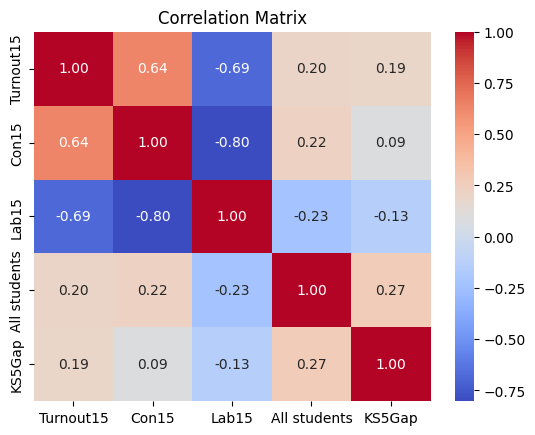

In [27]:
import seaborn as sns
sns.heatmap(merged_data_england[['Turnout15','Con15','Lab15','All students', 'KS5Gap']].corr(), # plot a correlation matrix
            annot=True, # show the correlation values on the plot
            fmt=".2f", # set the format of the correlation values to be two decimal places
            cmap='coolwarm') # set the color palette to be coolwarm (blue for negative correlations, red for positive correlations)

plt.title('Correlation Matrix')

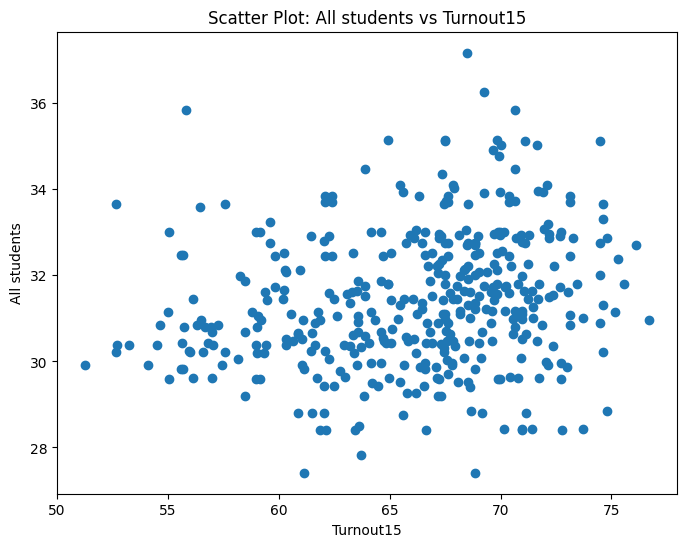

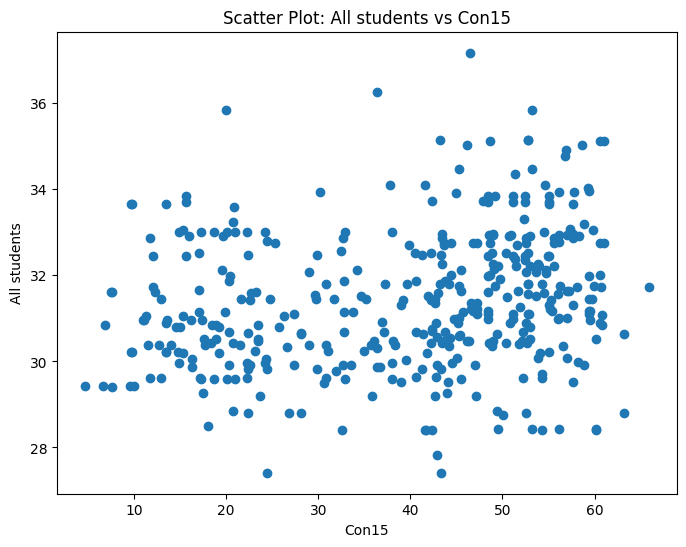

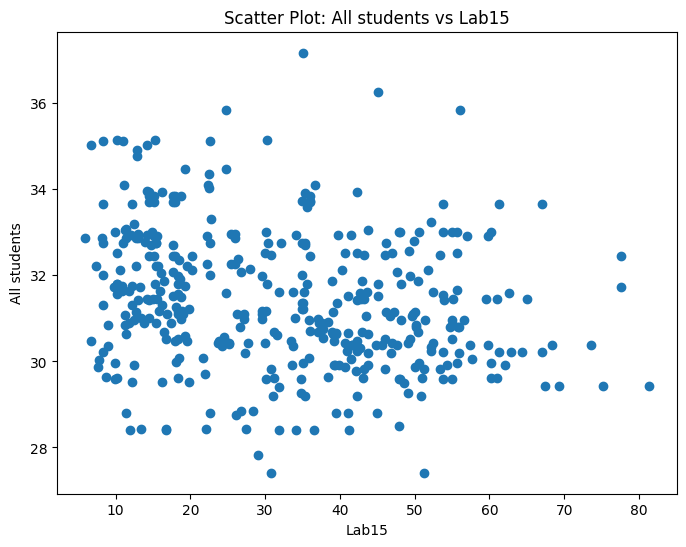

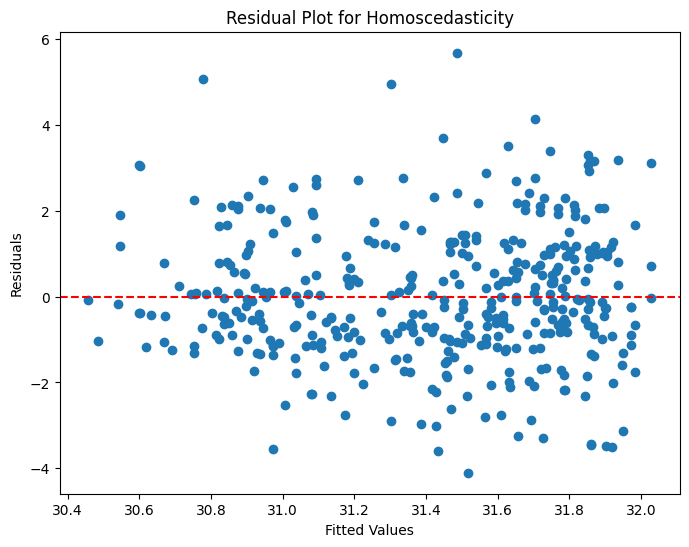


Breusch Pagan test for Heteroskedasticity:
[('Lagrange multiplier statistic', 2.4669603538335387), ('p-value', 0.4812916891048238), ('f-value', 0.8191726888491145), ('f p-value', 0.4838364757377258)]

Variance Inflation Factors (VIF):
   VIF Factor   features
0  393.108545      const
1    1.983949  Turnout15
2    2.925193      Con15
3    3.308763      Lab15


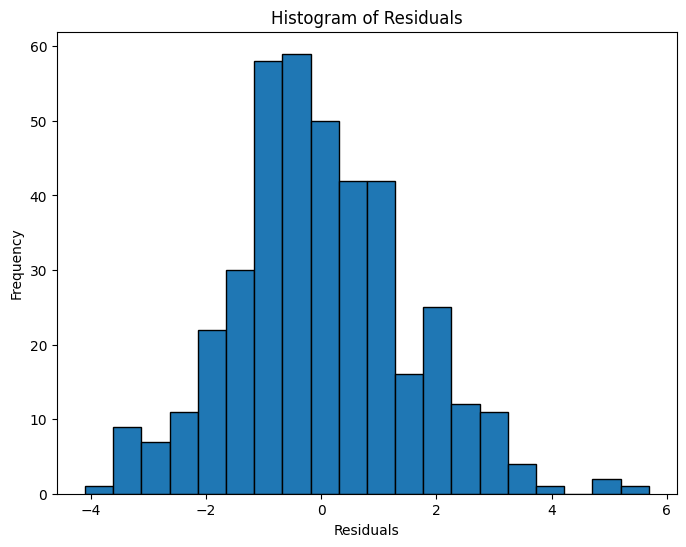

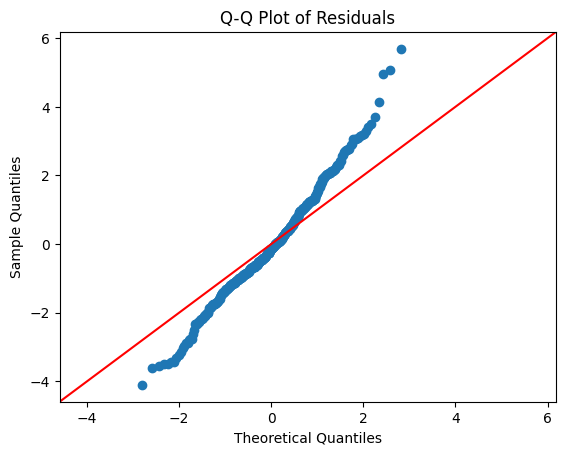


Shapiro-Wilk test for normality
ShapiroResult(statistic=0.9887869691499958, pvalue=0.0034783456343197637)


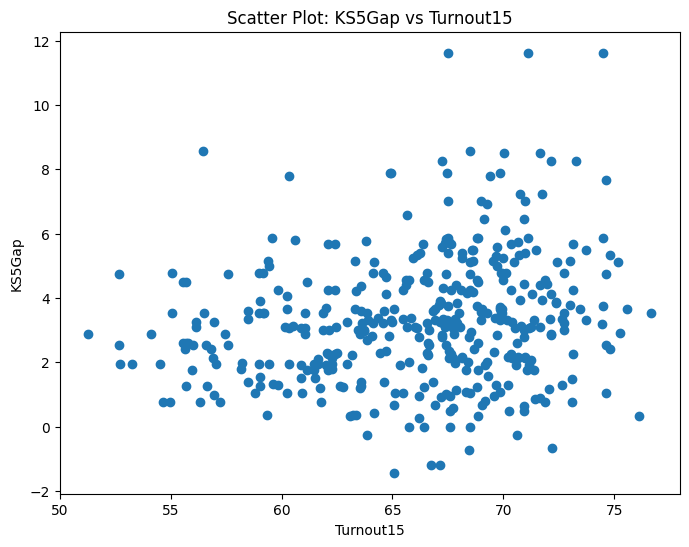

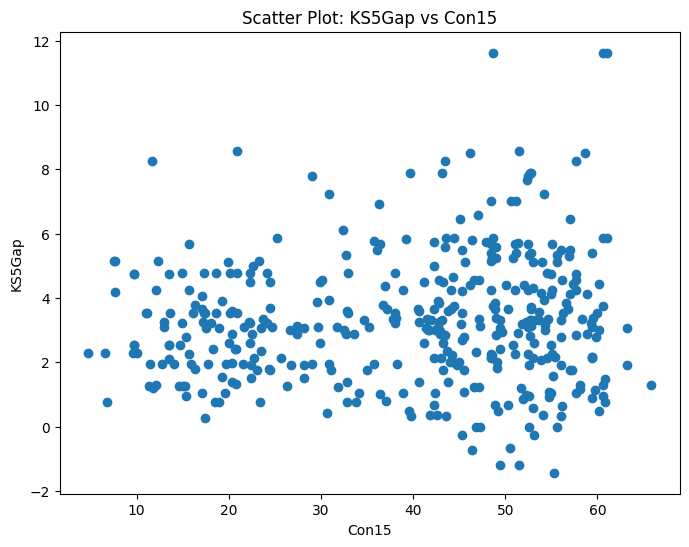

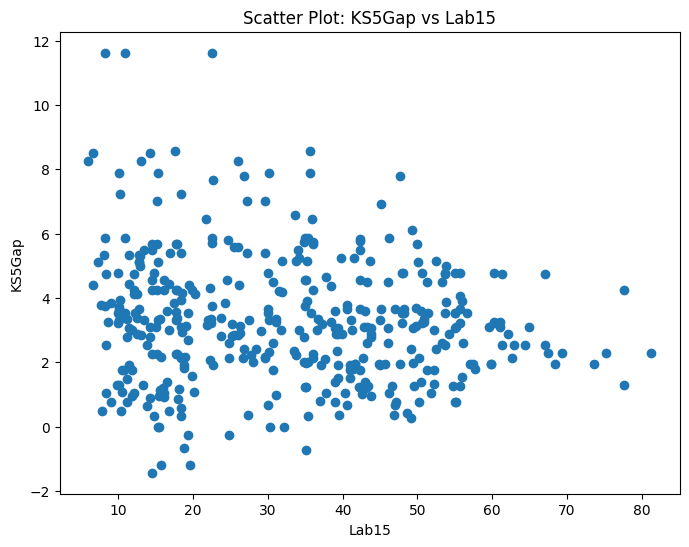

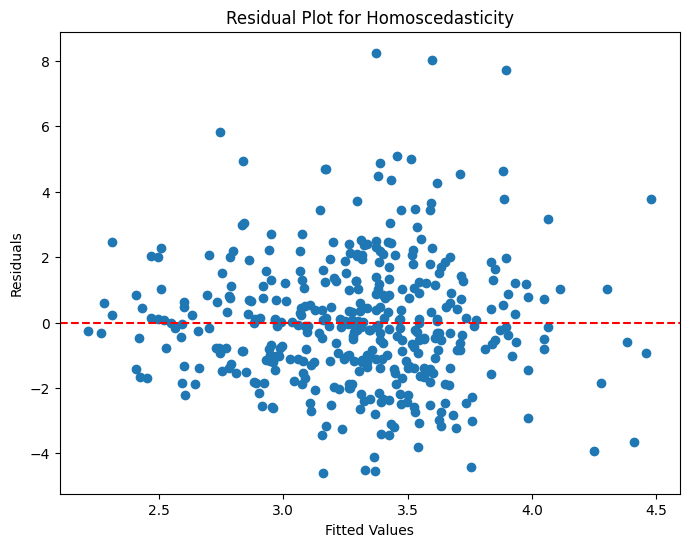


Breusch Pagan test for Heteroskedasticity:
[('Lagrange multiplier statistic', 17.953799231387187), ('p-value', 0.00044960608575731766), ('f-value', 6.201477362996857), ('f p-value', 0.00039877245863651476)]

Variance Inflation Factors (VIF):
   VIF Factor   features
0  393.108545      const
1    1.983949  Turnout15
2    2.925193      Con15
3    3.308763      Lab15


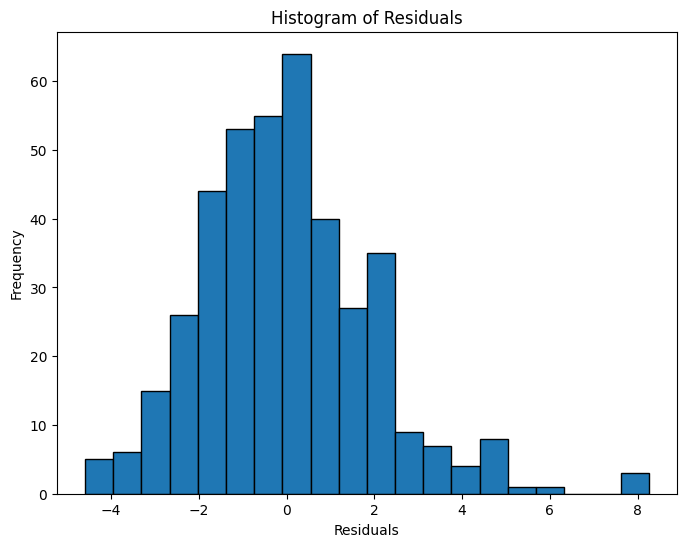

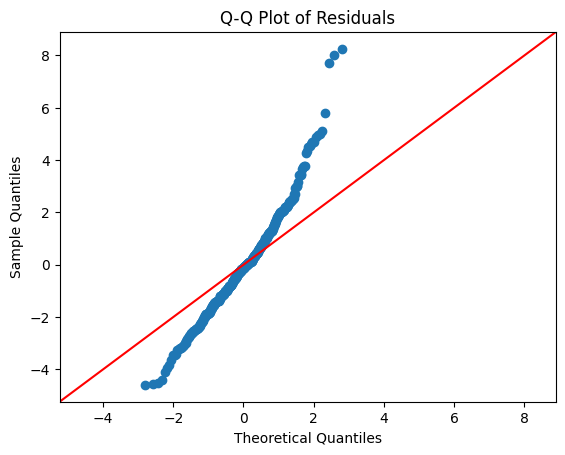


Shapiro-Wilk test for normality
ShapiroResult(statistic=0.9704941116645893, pvalue=2.838900756777232e-07)


In [28]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats


def check_regression_assumptions(data, dependent_variable, independent_variables):
    """
    Checks the assumptions of linear regression.

    Args:
        data: pandas DataFrame containing the data.
        dependent_variable: Name of the dependent variable column.
        independent_variables: List of names of the independent variable columns.
    """

    # Make sure KS5Gap is numeric
    data['KS5Gap'] = pd.to_numeric(data['KS5Gap'], errors='coerce')

    # Ensure all independent and dependent variables are numeric
    for var in independent_variables + [dependent_variable]:
       data[var] = pd.to_numeric(data[var], errors='coerce')

    # 1. Linearity - Scatter Plots
    for var in independent_variables:
        plt.figure(figsize=(8, 6))
        plt.scatter(data[var], data[dependent_variable])
        plt.xlabel(var)
        plt.ylabel(dependent_variable)
        plt.title(f"Scatter Plot: {dependent_variable} vs {var}")
        plt.show()

    # Fit the model for all the below tests
    X = data[independent_variables]
    y = data[dependent_variable]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()

    # 3. Homoscedasticity - Residual Plot
    plt.figure(figsize=(8, 6))
    plt.scatter(model.fittedvalues, model.resid)
    plt.axhline(y=0, color="red", linestyle="--")
    plt.xlabel("Fitted Values")
    plt.ylabel("Residuals")
    plt.title("Residual Plot for Homoscedasticity")
    plt.show()

    # 3. Homoscedasticity - Breusch Pagan test
    names = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
    test = sm.stats.het_breuschpagan(model.resid, model.model.exog)
    print("\nBreusch Pagan test for Heteroskedasticity:")
    print(list(zip(names, test)))

    # 4. Multicollinearity
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns
    print("\nVariance Inflation Factors (VIF):")
    print(vif)

    # 5. Normality of Residuals - Histogram
    plt.figure(figsize=(8, 6))
    plt.hist(model.resid, bins=20, edgecolor="black")
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.title("Histogram of Residuals")
    plt.show()

    # 5. Normality of Residuals - Q-Q plot
    sm.qqplot(model.resid, line='45')
    plt.title('Q-Q Plot of Residuals')
    plt.show()

    # 5. Normality of Residuals - Shapiro-Wilk
    shapiro_test = stats.shapiro(model.resid)
    print("\nShapiro-Wilk test for normality")
    print(shapiro_test)


dependent_variables = ["All students", "KS5Gap"]  # Include KS5Gap as a DV
independent_variables = ["Turnout15", "Con15", "Lab15"]

# Drop rows with missing values for all variables
merged_data_england = merged_data_england.dropna(subset=dependent_variables + independent_variables)

# Run the function for each dependent variable:
for dv in dependent_variables:
    check_regression_assumptions(merged_data_england, dv, independent_variables)

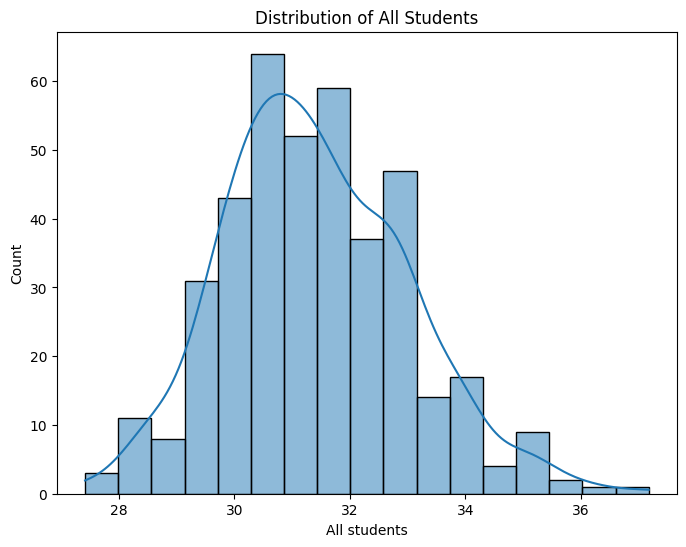

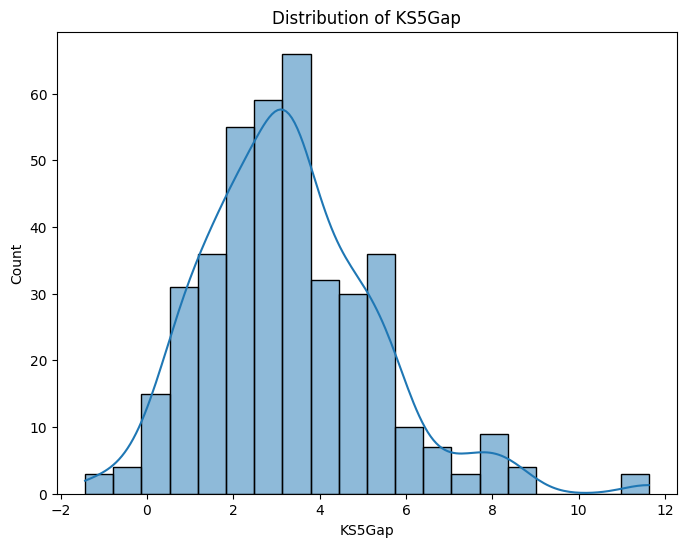

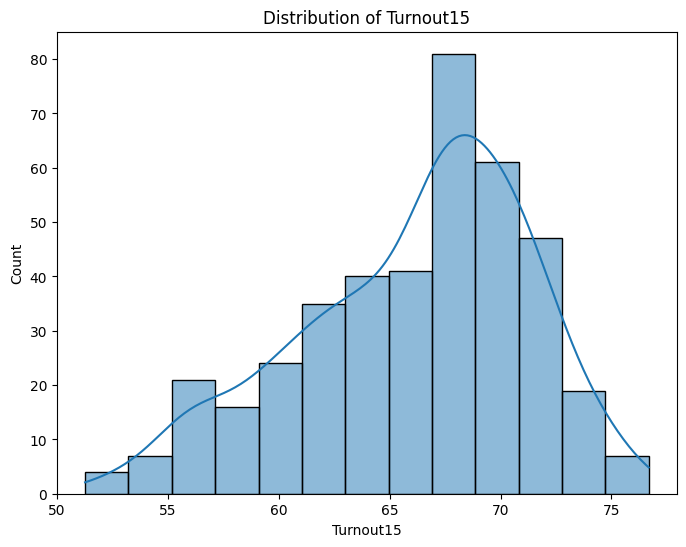

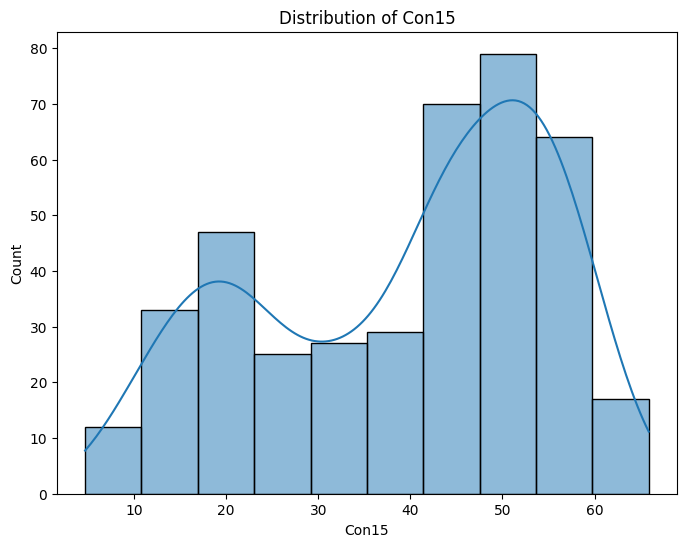

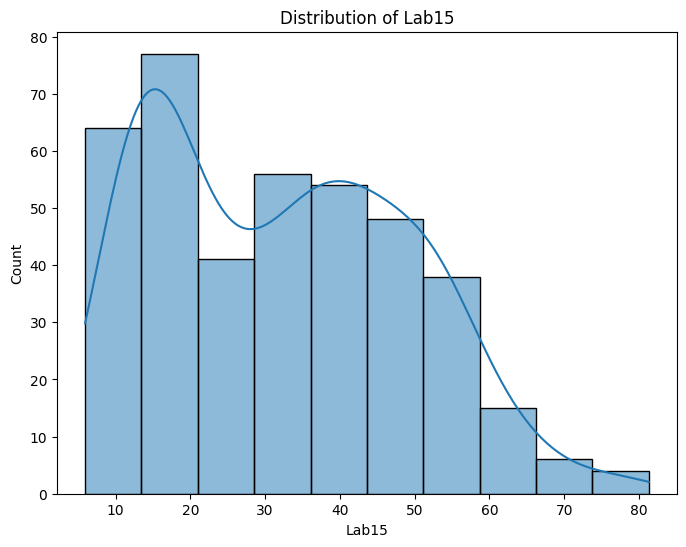

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dependent Variable
plt.figure(figsize=(8, 6))
sns.histplot(merged_data_england['All students'], kde=True) # Access 'All students' column
plt.title('Distribution of All Students')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(merged_data_england['KS5Gap'], kde=True) # Access 'KS5Gap' column
plt.title('Distribution of KS5Gap')
plt.show()


# Independent Variables
for var in ['Turnout15', 'Con15', 'Lab15']:
    plt.figure(figsize=(8, 6))
    sns.histplot(merged_data_england[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2824: UserWarning: n_quantiles (1000) is greater than the total number of samples (403). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2824: UserWarning: n_quantiles (1000) is greater than the total number of samples (403). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2824: UserWarning: n_quantiles (1000) is greater than the total number of samples (403). n_quantiles is set to n_samples.
  warnings.warn(


                            OLS Regression Results                            
Dep. Variable:           All students   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     8.881
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           1.04e-05
Time:                        16:27:47   Log-Likelihood:                -747.30
No. Observations:                 403   AIC:                             1503.
Df Residuals:                     399   BIC:                             1519.
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.4124      0.078    404.463      0.0

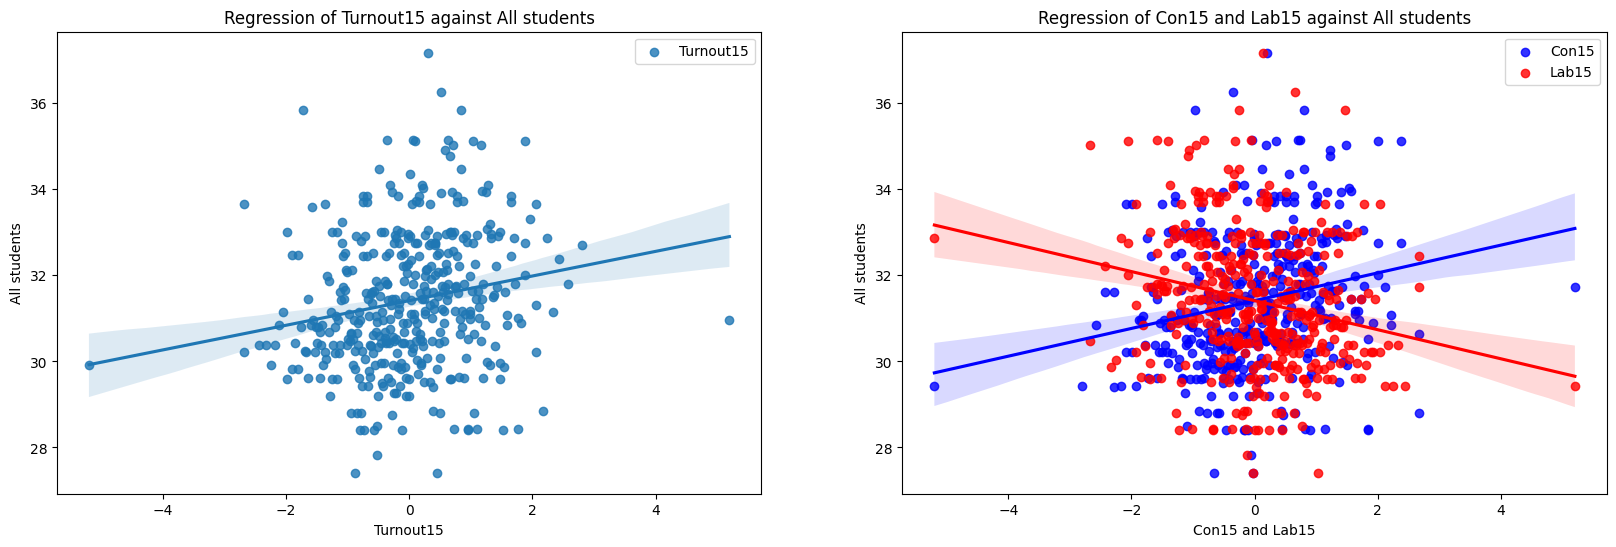

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2824: UserWarning: n_quantiles (1000) is greater than the total number of samples (403). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2824: UserWarning: n_quantiles (1000) is greater than the total number of samples (403). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2824: UserWarning: n_quantiles (1000) is greater than the total number of samples (403). n_quantiles is set to n_samples.
  warnings.warn(


                            OLS Regression Results                            
Dep. Variable:                 KS5Gap   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     5.712
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           0.000777
Time:                        16:27:50   Log-Likelihood:                -842.61
No. Observations:                 403   AIC:                             1693.
Df Residuals:                     399   BIC:                             1709.
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2960      0.099     33.436      0.0

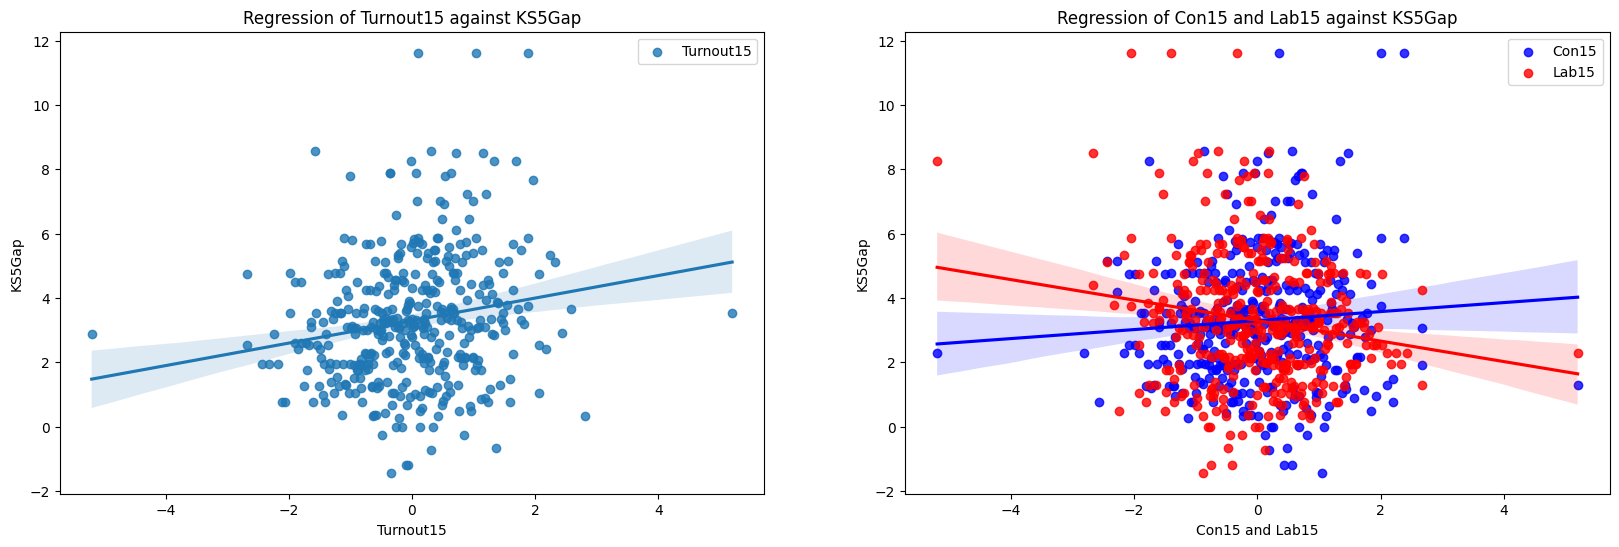

In [30]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer

def regression_with_robust_se_and_quantile(data, dependent_variable, independent_variables):
    # Make a copy of the data to avoid modifying the original
    data_copy = data.copy()

    # Initialize the QuantileTransformer
    qt = QuantileTransformer(output_distribution='normal')

    # Apply quantile transformation to independent variables
    for var in independent_variables:
        data_copy[var] = qt.fit_transform(data_copy[[var]])

    # Separate turnout from other independent variables (if applicable)
    turnout_var = 'Turnout15'
    if turnout_var in independent_variables:
        independent_variables_no_turnout = [var for var in independent_variables if var != turnout_var]
        X_no_turnout = data_copy[independent_variables_no_turnout]
        X_turnout = data_copy[turnout_var]

        # Standardize turnout
        X_turnout = (X_turnout - X_turnout.mean()) / X_turnout.std()
        X = pd.concat([X_no_turnout, X_turnout], axis=1)
    else:
        X = data_copy[independent_variables]

    y = data_copy[dependent_variable]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit(cov_type='HC3')  # HC3 for robust SE

    print(model.summary())

    # Plotting
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # 1 row, 2 columns of plots

    # Plot for Turnout15
    sns.regplot(x=turnout_var, y=dependent_variable, data=data_copy, label=turnout_var, ax=axes[0])
    axes[0].set_xlabel(turnout_var)
    axes[0].set_ylabel(dependent_variable)
    axes[0].set_title(f"Regression of {turnout_var} against {dependent_variable}")
    axes[0].legend()

    # Plot for Con15 and Lab15 on the same subplot
    sns.regplot(x='Con15', y=dependent_variable, data=data_copy, label='Con15', color='blue', ax=axes[1])
    sns.regplot(x='Lab15', y=dependent_variable, data=data_copy, label='Lab15', color='red', ax=axes[1])
    axes[1].set_xlabel("Con15 and Lab15")  # Combined x-axis label
    axes[1].set_ylabel(dependent_variable)
    axes[1].set_title(f"Regression of Con15 and Lab15 against {dependent_variable}")
    axes[1].legend()

    plt.show()

    return model

# Example usage:
dependent_variables = ["All students", "KS5Gap"]
independent_variables = ["Turnout15", "Con15", "Lab15"]
models = []

for dv in dependent_variables:
    # Convert dependent variable to numeric, if necessary:
    merged_data_england[dv] = pd.to_numeric(merged_data_england[dv], errors='coerce')

    # Fit the model
    model = regression_with_robust_se_and_quantile(merged_data_england, dv, independent_variables)
    models.append(model)

In [32]:
!pip install statsmodels
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col # Import the summary_col function

# Create the regression table:
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

reg_table = summary_col(
    models,
    stars=True,
    float_format='%0.2f',
    model_names=dependent_variables,  # DV names as model names
    info_dict=info_dict,
    regressor_order=['const', 'Turnout15', 'Con15', 'Lab15']
)

print(reg_table)


                 All students  KS5Gap
-------------------------------------
const            31.41***     3.30***
                 (0.08)       (0.10) 
Turnout15        0.11         0.29** 
                 (0.09)       (0.11) 
Con15            0.15         -0.21  
                 (0.10)       (0.16) 
Lab15            -0.16        -0.29* 
                 (0.11)       (0.17) 
R-squared        0.06         0.04   
R-squared Adj.   0.05         0.04   
No. observations 403          403    
R-squared        0.06         0.04   
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01
